This page is taken from Github: https://github.com/eliorc/node2vec

In [1]:
### 导入必要的包
import networkx as nx
from node2vec import Node2Vec

# 导入 Karate 示例图
G1 = nx.karate_club_graph()
# Create a graph
G2 = nx.fast_gnp_random_graph(n=100, p=0.5)
graphs = []
graphs.append(G1)
graphs.append(G2)

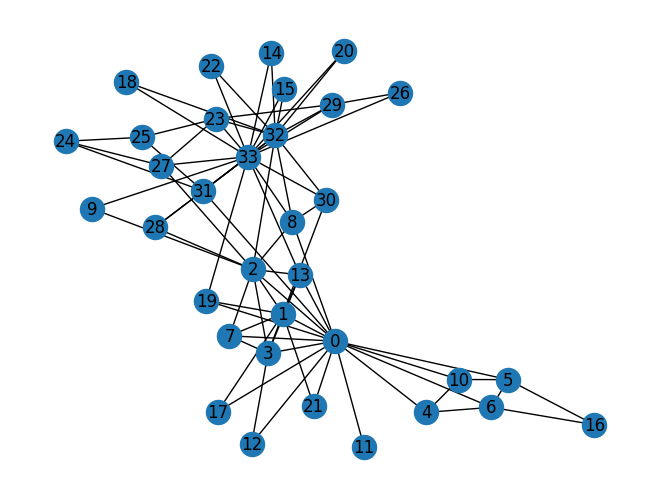

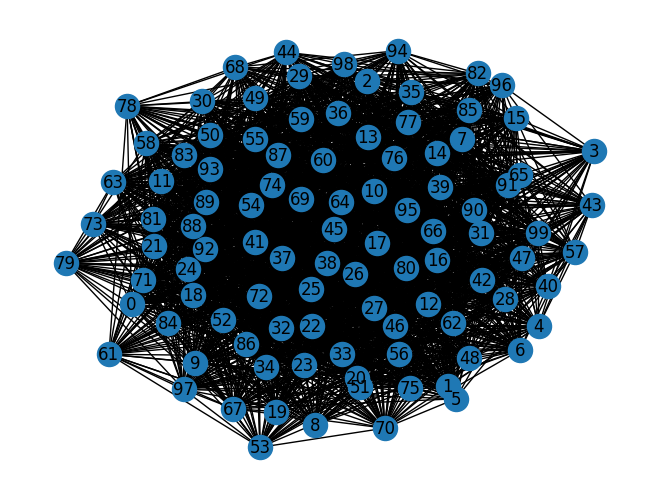

In [2]:
### 把图画出来看一看
import matplotlib.pyplot as plt

# Iterate over the graphs in the list
for graph in graphs:
    # Create a new figure for each graph
    plt.figure()
    # Draw the graph with labels
    nx.draw(graph, with_labels=True)
    # Show the figure
    plt.show()


In [3]:
%%time
# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
node2vec_G1 = Node2Vec(G1, dimensions=2, walk_length=12, num_walks=50, workers=32)  #, temp_folder='test'
 
# Embed nodes
model_G1 = node2vec_G1.fit(window=10, min_count=1, batch_words=4)  
# Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)
model_G1.wv.save_word2vec_format('Karate_Embedding')

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

Generating walks (CPU: 30): 100%|██████████| 1/1 [00:00<00:00, 511.75it/s]


CPU times: user 657 ms, sys: 385 ms, total: 1.04 s
Wall time: 19.7 s


In [4]:
%%time
# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
node2vec_G2 = Node2Vec(G2, dimensions=64, walk_length=30, num_walks=200, workers=32) #, temp_folder='test' # Use temp_folder for big graphs
 
# Embed nodes 
model_G2 = node2vec_G2.fit(window=10, min_count=1, batch_words=4)  
# Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 32): 100%|██████████| 6/6 [00:00<00:00, 15.76it/s]


CPU times: user 18.6 s, sys: 4.08 s, total: 22.6 s
Wall time: 22.8 s


In [5]:
### 查看图 G1 中与 '0'最相似的顶点
### 注意 使用 node2vec 这个包时 输出的顶点嵌入其index均为文本格式 例如 '0'
model_G1.wv.most_similar('0') 
### 输出的好像是相似度？？

[('7', 0.999929666519165),
 ('3', 0.9999212622642517),
 ('11', 0.9997997879981995),
 ('17', 0.9997321963310242),
 ('21', 0.9997224807739258),
 ('12', 0.9982478022575378),
 ('4', 0.9965906143188477),
 ('16', 0.9947509169578552),
 ('10', 0.9944340586662292),
 ('1', 0.9943867325782776)]

In [6]:
### in graph G1, Access the embedding of sample nodes
for i in range(8):
    embedding = model_G1.wv[f'{i}']
    print(f"Node {i} is embedded as vector:\n {embedding}.\n")

Node 0 is embedded as vector:
 [-0.7334624  1.4051963].

Node 1 is embedded as vector:
 [-0.7828426  1.1766411].

Node 2 is embedded as vector:
 [-0.8579506   0.77447116].

Node 3 is embedded as vector:
 [-0.71153563  1.4059396 ].

Node 4 is embedded as vector:
 [-0.7313494  1.7372322].

Node 5 is embedded as vector:
 [-0.70191956  1.8315637 ].

Node 6 is embedded as vector:
 [-0.701719  1.925719].

Node 7 is embedded as vector:
 [-0.71440977  1.330005  ].



In [7]:
### in graph G2, Access the embedding of sample nodes
for i in range(2):
    embedding = model_G2.wv[f'{i}']
    print(f"Node {i} is embedded as vector:\n {embedding}.\n")

Node 0 is embedded as vector:
 [ 0.10482577 -0.22037674  0.00906675 -0.03236805 -0.0888493  -0.10994296
 -0.01728532 -0.05942989 -0.01689686  0.11470038  0.05165316 -0.27959722
  0.03009059 -0.1472508  -0.03897334 -0.0860764  -0.12963538  0.11589467
 -0.03865315  0.2483129   0.06393141  0.16111657  0.16962412  0.05127638
  0.02944642  0.08972865 -0.09385891 -0.10117096  0.01109571  0.05115408
 -0.07897628  0.07560838 -0.05049132 -0.18314084 -0.05456894 -0.00346303
  0.06319282 -0.08955637  0.0396987  -0.0111938   0.06056684 -0.13886707
 -0.1776785  -0.13467754  0.06172863  0.06080219  0.17322293 -0.27882445
 -0.14630556  0.17698964 -0.08807327  0.06340487 -0.04445467  0.10493735
  0.2381632   0.22963725 -0.01911315 -0.04330689 -0.08220073  0.09253417
  0.06599337 -0.12280047 -0.01561917  0.19987735].

Node 1 is embedded as vector:
 [-0.06264161 -0.0696789  -0.02216478  0.1346733   0.0332942  -0.2910412
  0.1200553  -0.07146237 -0.13508567 -0.0555267   0.1694749  -0.10639737
  0.0543358